In [2]:
import numpy as np  # Numpy helps us to do complex and high-level mathematical functions on large,
                    # multi-dimentional array and matrices
    
import pandas as pd # Pandas offers us data structures and operations for manipulating numerical 
                    #tables and time series
    
import matplotlib.pyplot as plt # Matplotlib helps us to embed plots into applications, commonly used
                                # for data visualisation
    
import seaborn as sns # Seaborn provides a high-level interface for drawing attractive and informative 
                      # statistical graphics.
    
sns.set_theme(style='darkgrid') # Setting the style of seaborn plots to 'darkgrid'

import plotly.express as px # Plotly is yet another data visualisation and interactive open-source library.
                            # Plotly graph objects are a high-level 

In [3]:
df = pd.read_csv("C:\\New folder\\Space_Corrected.csv")

In [4]:
df.head()

Unnamed: 0.1  Unnamed: 0 Company Name  \
0             0           0       SpaceX   
1             1           1         CASC   
2             2           2       SpaceX   
3             3           3    Roscosmos   
4             4           4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Datum                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Status Rocket  Rocket Status Mission  
0  StatusActive   50.0         Success  
1  StatusActive  29.75         Success  
2  StatusActive     NaN        Success  
3  StatusActive   65.0         Success  
4  StatusActive  145.0         Success

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [6]:
df.shape

(4324, 9)

In [7]:
df.head()

Unnamed: 0.1  Unnamed: 0 Company Name  \
0             0           0       SpaceX   
1             1           1         CASC   
2             2           2       SpaceX   
3             3           3    Roscosmos   
4             4           4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Datum                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Status Rocket  Rocket Status Mission  
0  StatusActive   50.0         Success  
1  StatusActive  29.75         Success  
2  StatusActive     NaN        Success  
3  StatusActive   65.0         Success  
4  StatusActive  145.0         Success

In [8]:
df=df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [9]:
df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')

In [10]:
df=df.rename(columns={' Rocket':'Rocket'})

In [11]:
df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       'Rocket', 'Status Mission'],
      dtype='object')

In [12]:
df["Country"] = df["Location"].apply(lambda location: location.split(", ")[-1])
# We cant directly use a function on a dataframe object.

In [13]:
df.head()

Company Name                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Datum                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Status Rocket  Rocket Status Mission     Country  
0  StatusActive   50.0         Success         USA  
1  StatusActive  29.75         Success       China  
2  StatusActive     NaN        Success         USA  
3  StatusActive   65.0         Success  Kazakhstan  
4  StatusActive  145.0         Success         USA

In [14]:
df['DateTime'] = pd.to_datetime(df['Datum']) 
df['Year'] = df['DateTime'].apply(lambda datetime: datetime.year)

In [15]:
df.head()

Company Name                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Datum                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Status Rocket  Rocket Status Mission     Country                   DateTime  \
0  StatusActive   50.0         Success         USA  2020-08-07 05:12:00+00:00   
1  StatusActive  29.75         Success       China  2020-08-06 04:01:00+00:00   
2  StatusActive     NaN        Success         USA  2020-08-04 23:57:00+00:00   
3  StatusActive   65.0         Success  Kazakhstan  2020-07-30 21:25:00+00:00   
4  StatusActive  145.0         Success         USA  2020-07-30 11:50:00+00:00   

   Year  
0  2020  
1  2020  
2  2020  
3  2020  
4  2020

In [16]:
df["Launch_Site"] = df["Location"].apply(lambda location: ", ".join(location.split(", ")[:-1]))
# Seperating the Launch Site

In [17]:
df.head()

Company Name                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Datum                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Status Rocket  Rocket Status Mission     Country                   DateTime  \
0  StatusActive   50.0         Success         USA  2020-08-07 05:12:00+00:00   
1  StatusActive  29.75         Success       China  2020-08-06 04:01:00+00:00   
2  StatusActive     NaN        Success         USA  2020-08-04 23:57:00+00:00   
3  StatusActive   65.0         Success  Kazakhstan  2020-07-30 21:25:00+00:00   
4  StatusActive  145.0         Success         USA  2020-07-30 11:50:00+00:00   

   Year                                        Launch_Site  
0  2020              LC-39A, Kennedy Space Center, Florida  
1  2020  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...  
2  2020                           Pad A, Boca Chica, Texas  
3  2020                   Site 200/39, Baikonur Cosmodrome  
4  2020                SLC-41, Cape Canaveral AFS, Florida

In [18]:
df['Rocket'].unique()

array(['50.0 ', '29.75 ', nan, '65.0 ', '145.0 ', '64.68 ', '48.5 ',
       '90.0 ', '46.0 ', '28.3 ', '29.15 ', '7.5 ', '30.8 ', '5.3 ',
       '12.0 ', '112.5 ', '120.0 ', '153.0 ', '200.0 ', '85.0 ', '115.0 ',
       '41.8 ', '21.0 ', '31.0 ', '40.0 ', '164.0 ', '62.0 ', '37.0 ',
       '350.0 ', '39.0 ', '47.0 ', '35.0 ', '69.7 ', '109.0 ', '45.0 ',
       '123.0 ', '130.0 ', '25.0 ', '56.5 ', '15.0 ', '29.0 ', '80.0 ',
       '140.0 ', '55.0 ', '59.5 ', '450.0 ', '7.0 ', '20.14 ', '133.0 ',
       '190.0 ', '135.0 ', '20.0 ', '136.6 ', '5,000.0 ', '1,160.0 ',
       '59.0 ', '63.23 '], dtype=object)

In [19]:
df['Rocket'] = df['Rocket'].fillna(0.0).str.replace(',', '')

In [20]:
df['Rocket'].unique()

array(['50.0 ', '29.75 ', nan, '65.0 ', '145.0 ', '64.68 ', '48.5 ',
       '90.0 ', '46.0 ', '28.3 ', '29.15 ', '7.5 ', '30.8 ', '5.3 ',
       '12.0 ', '112.5 ', '120.0 ', '153.0 ', '200.0 ', '85.0 ', '115.0 ',
       '41.8 ', '21.0 ', '31.0 ', '40.0 ', '164.0 ', '62.0 ', '37.0 ',
       '350.0 ', '39.0 ', '47.0 ', '35.0 ', '69.7 ', '109.0 ', '45.0 ',
       '123.0 ', '130.0 ', '25.0 ', '56.5 ', '15.0 ', '29.0 ', '80.0 ',
       '140.0 ', '55.0 ', '59.5 ', '450.0 ', '7.0 ', '20.14 ', '133.0 ',
       '190.0 ', '135.0 ', '20.0 ', '136.6 ', '5000.0 ', '1160.0 ',
       '59.0 ', '63.23 '], dtype=object)

In [21]:
#Data Visualisation

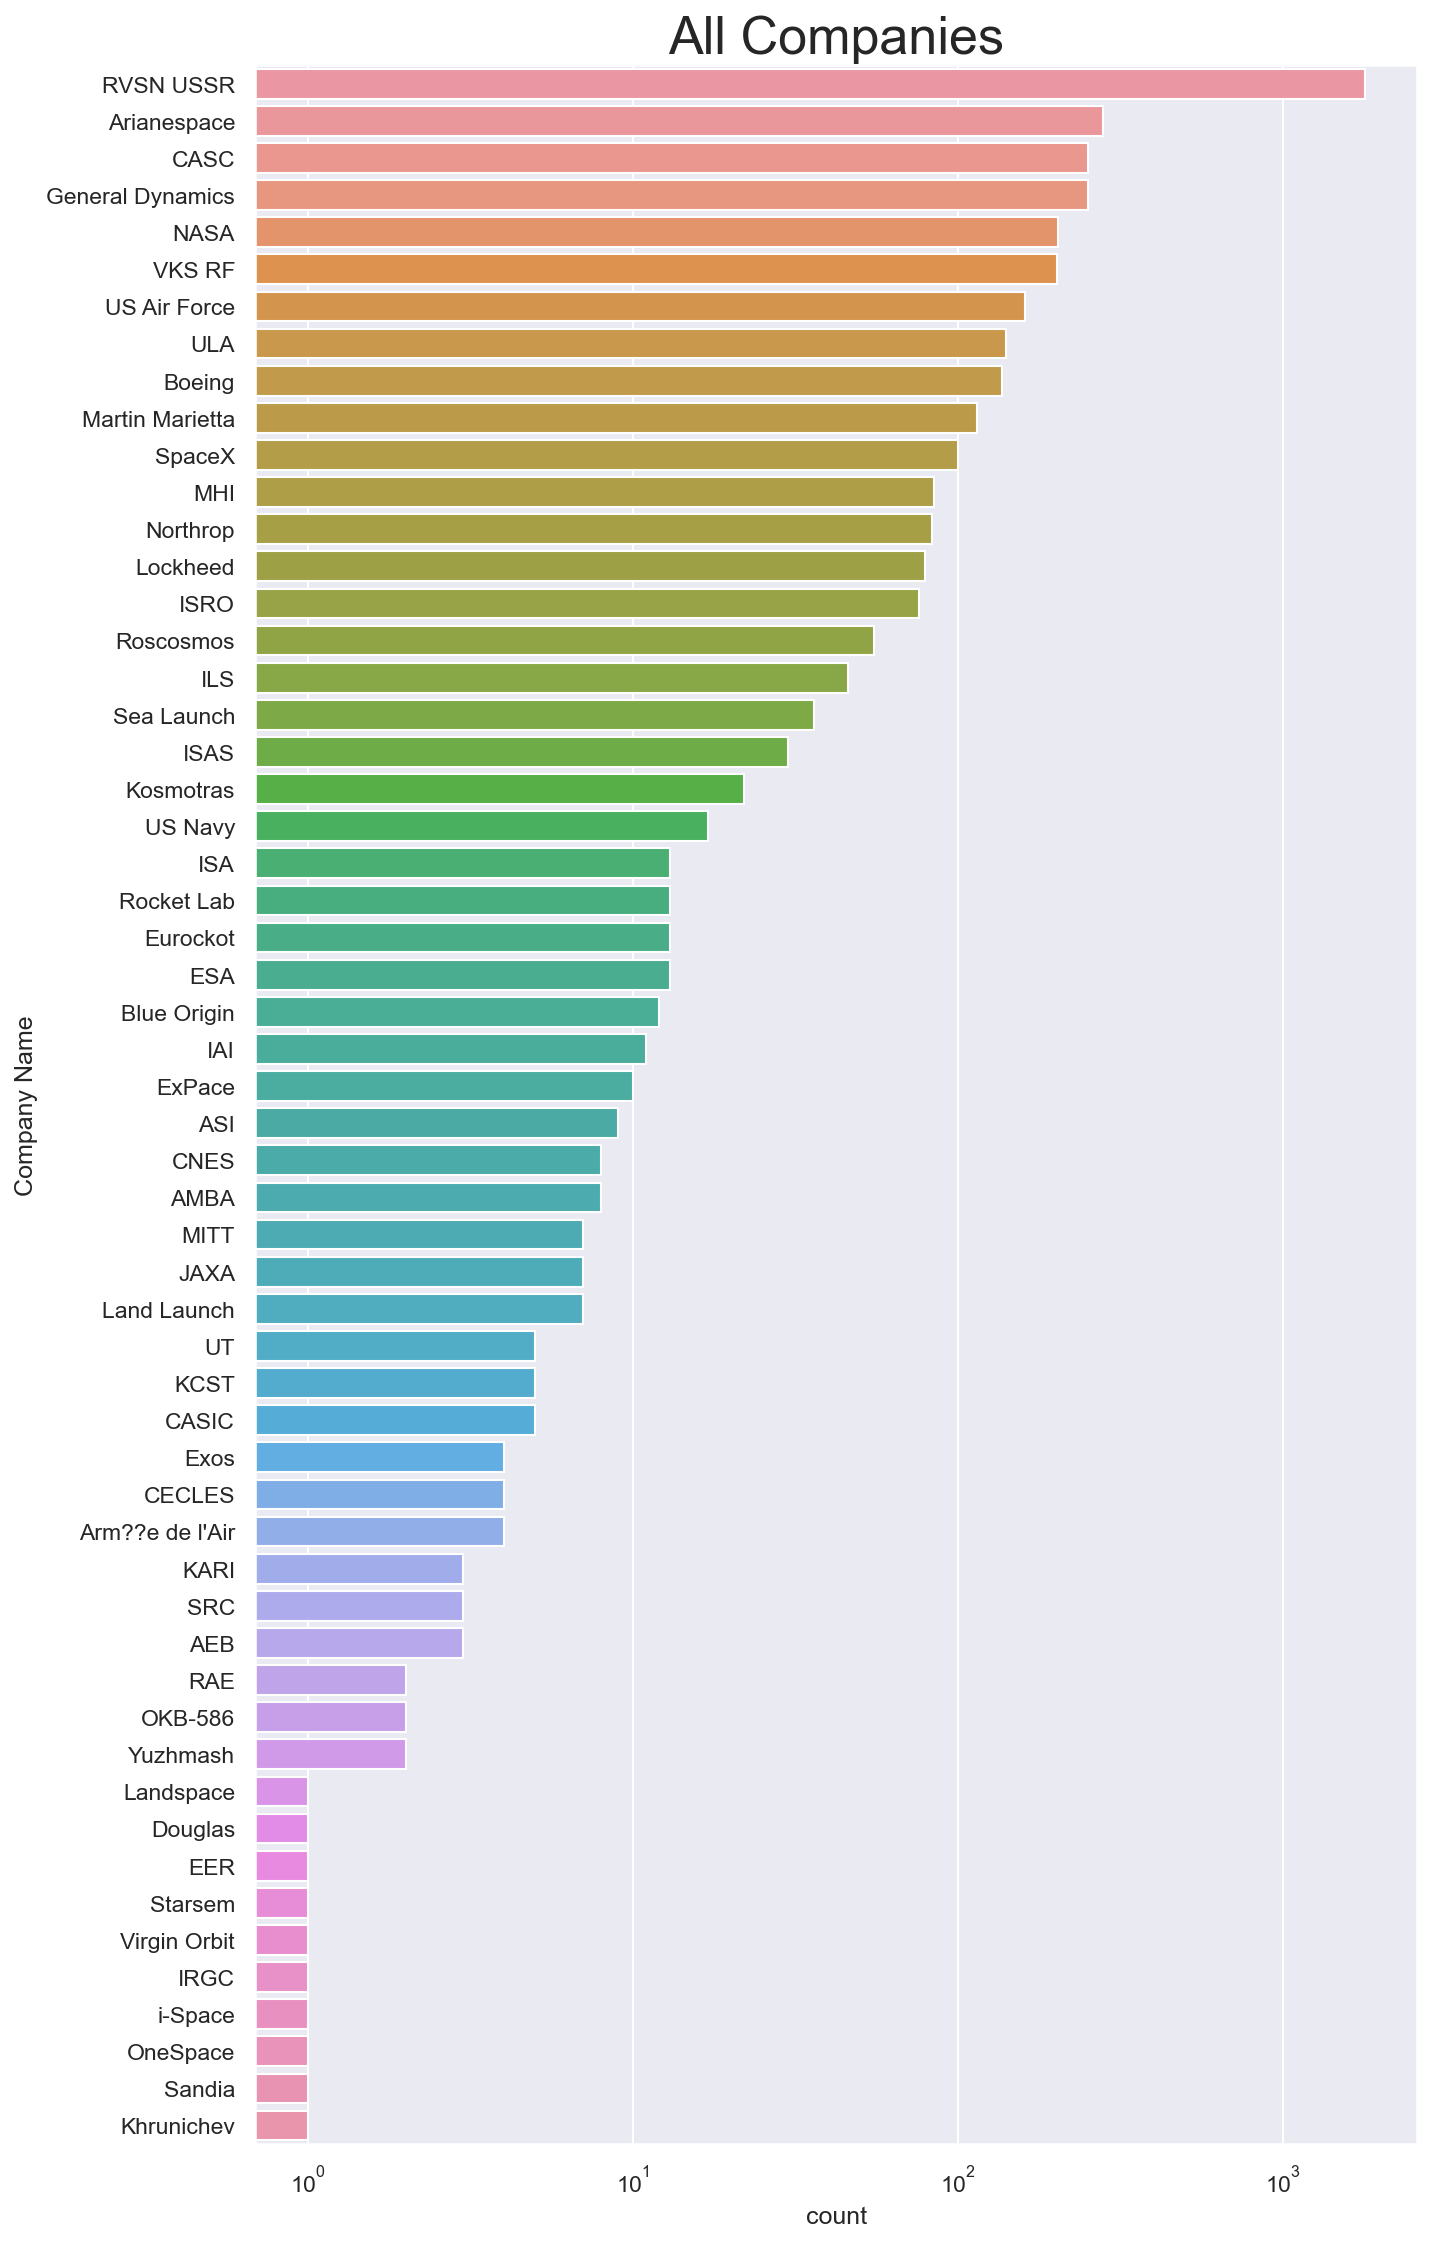

In [22]:
plt.figure(figsize=(10,18),dpi=150)
ax = sns.countplot(y="Company Name", data=df, order=df["Company Name"].value_counts().index)
ax.set_xscale("log")# Sets the scale to logarithmic value
plt.title('All Companies',size=25)
plt.show()

In [23]:
#TOP 20 COMPANIES..........

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


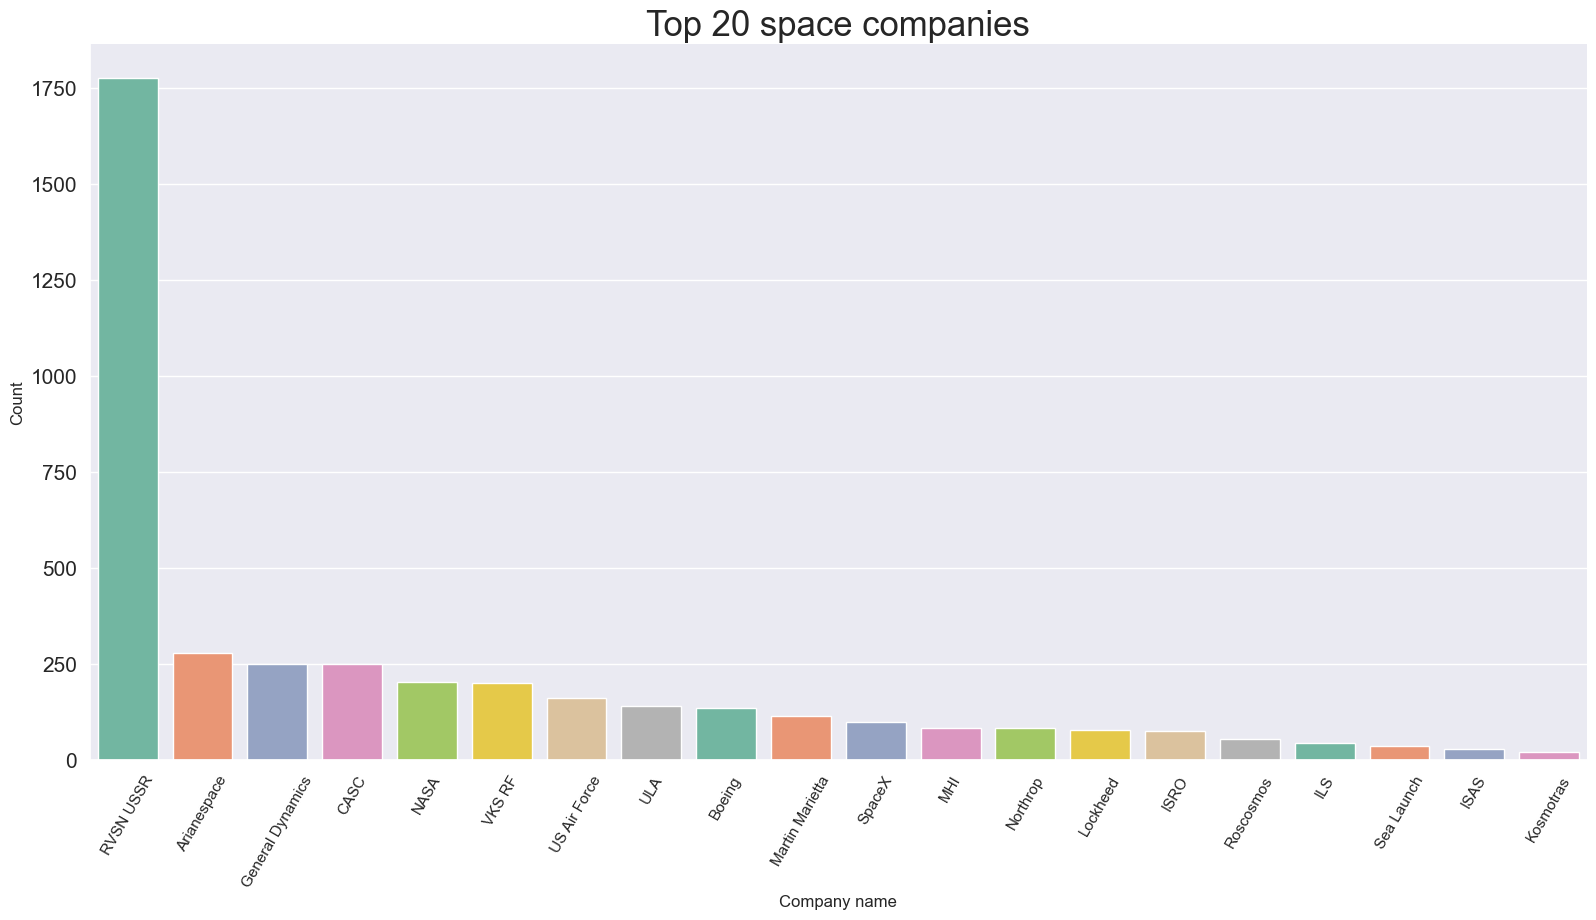

In [24]:
df['Count']=1
df_comps=df.groupby('Company Name')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_comps=df_comps.head(20)
sns.catplot('Company Name','Count',data=df_comps,palette='Set2',kind='bar',aspect=2,height=8)
plt.title('Top 20 space companies',size=25)
plt.xticks(rotation=60)
plt.xlabel('Company name')
plt.yticks(size=15)
plt.show()

In [25]:
#The top 15 companies in satellite mission

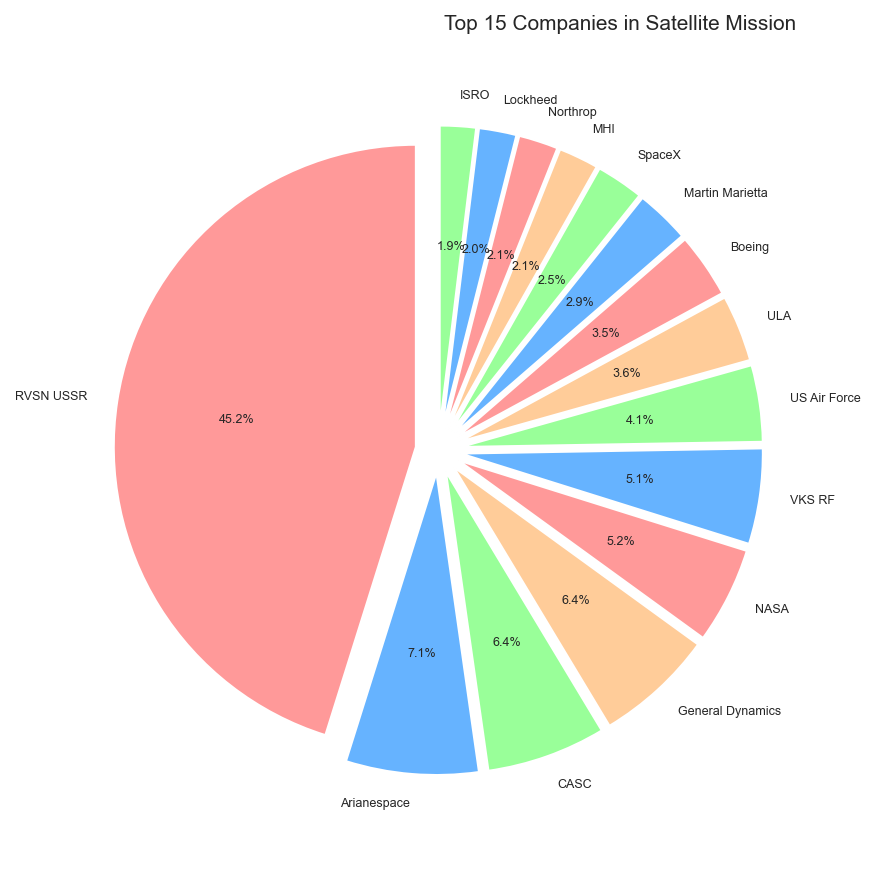

In [26]:
labels=list(df["Company Name"].value_counts()[:15].keys())
sizes=df["Company Name"].value_counts()[:15]
explode=[]
for i in labels:
    explode.append(0.075)
plt.figure(figsize=(6,6),dpi=150)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(sizes,labels=labels,explode=explode, autopct='%1.1f%%', startangle=90, shadow=False,
        textprops={'fontsize': 6},colors=colors)
plt.title("Top 15 Companies in Satellite Mission", fontsize=10, loc="right")
plt.axis("equal")
plt.tight_layout()

In [27]:
#Countplot of Missions by Countries

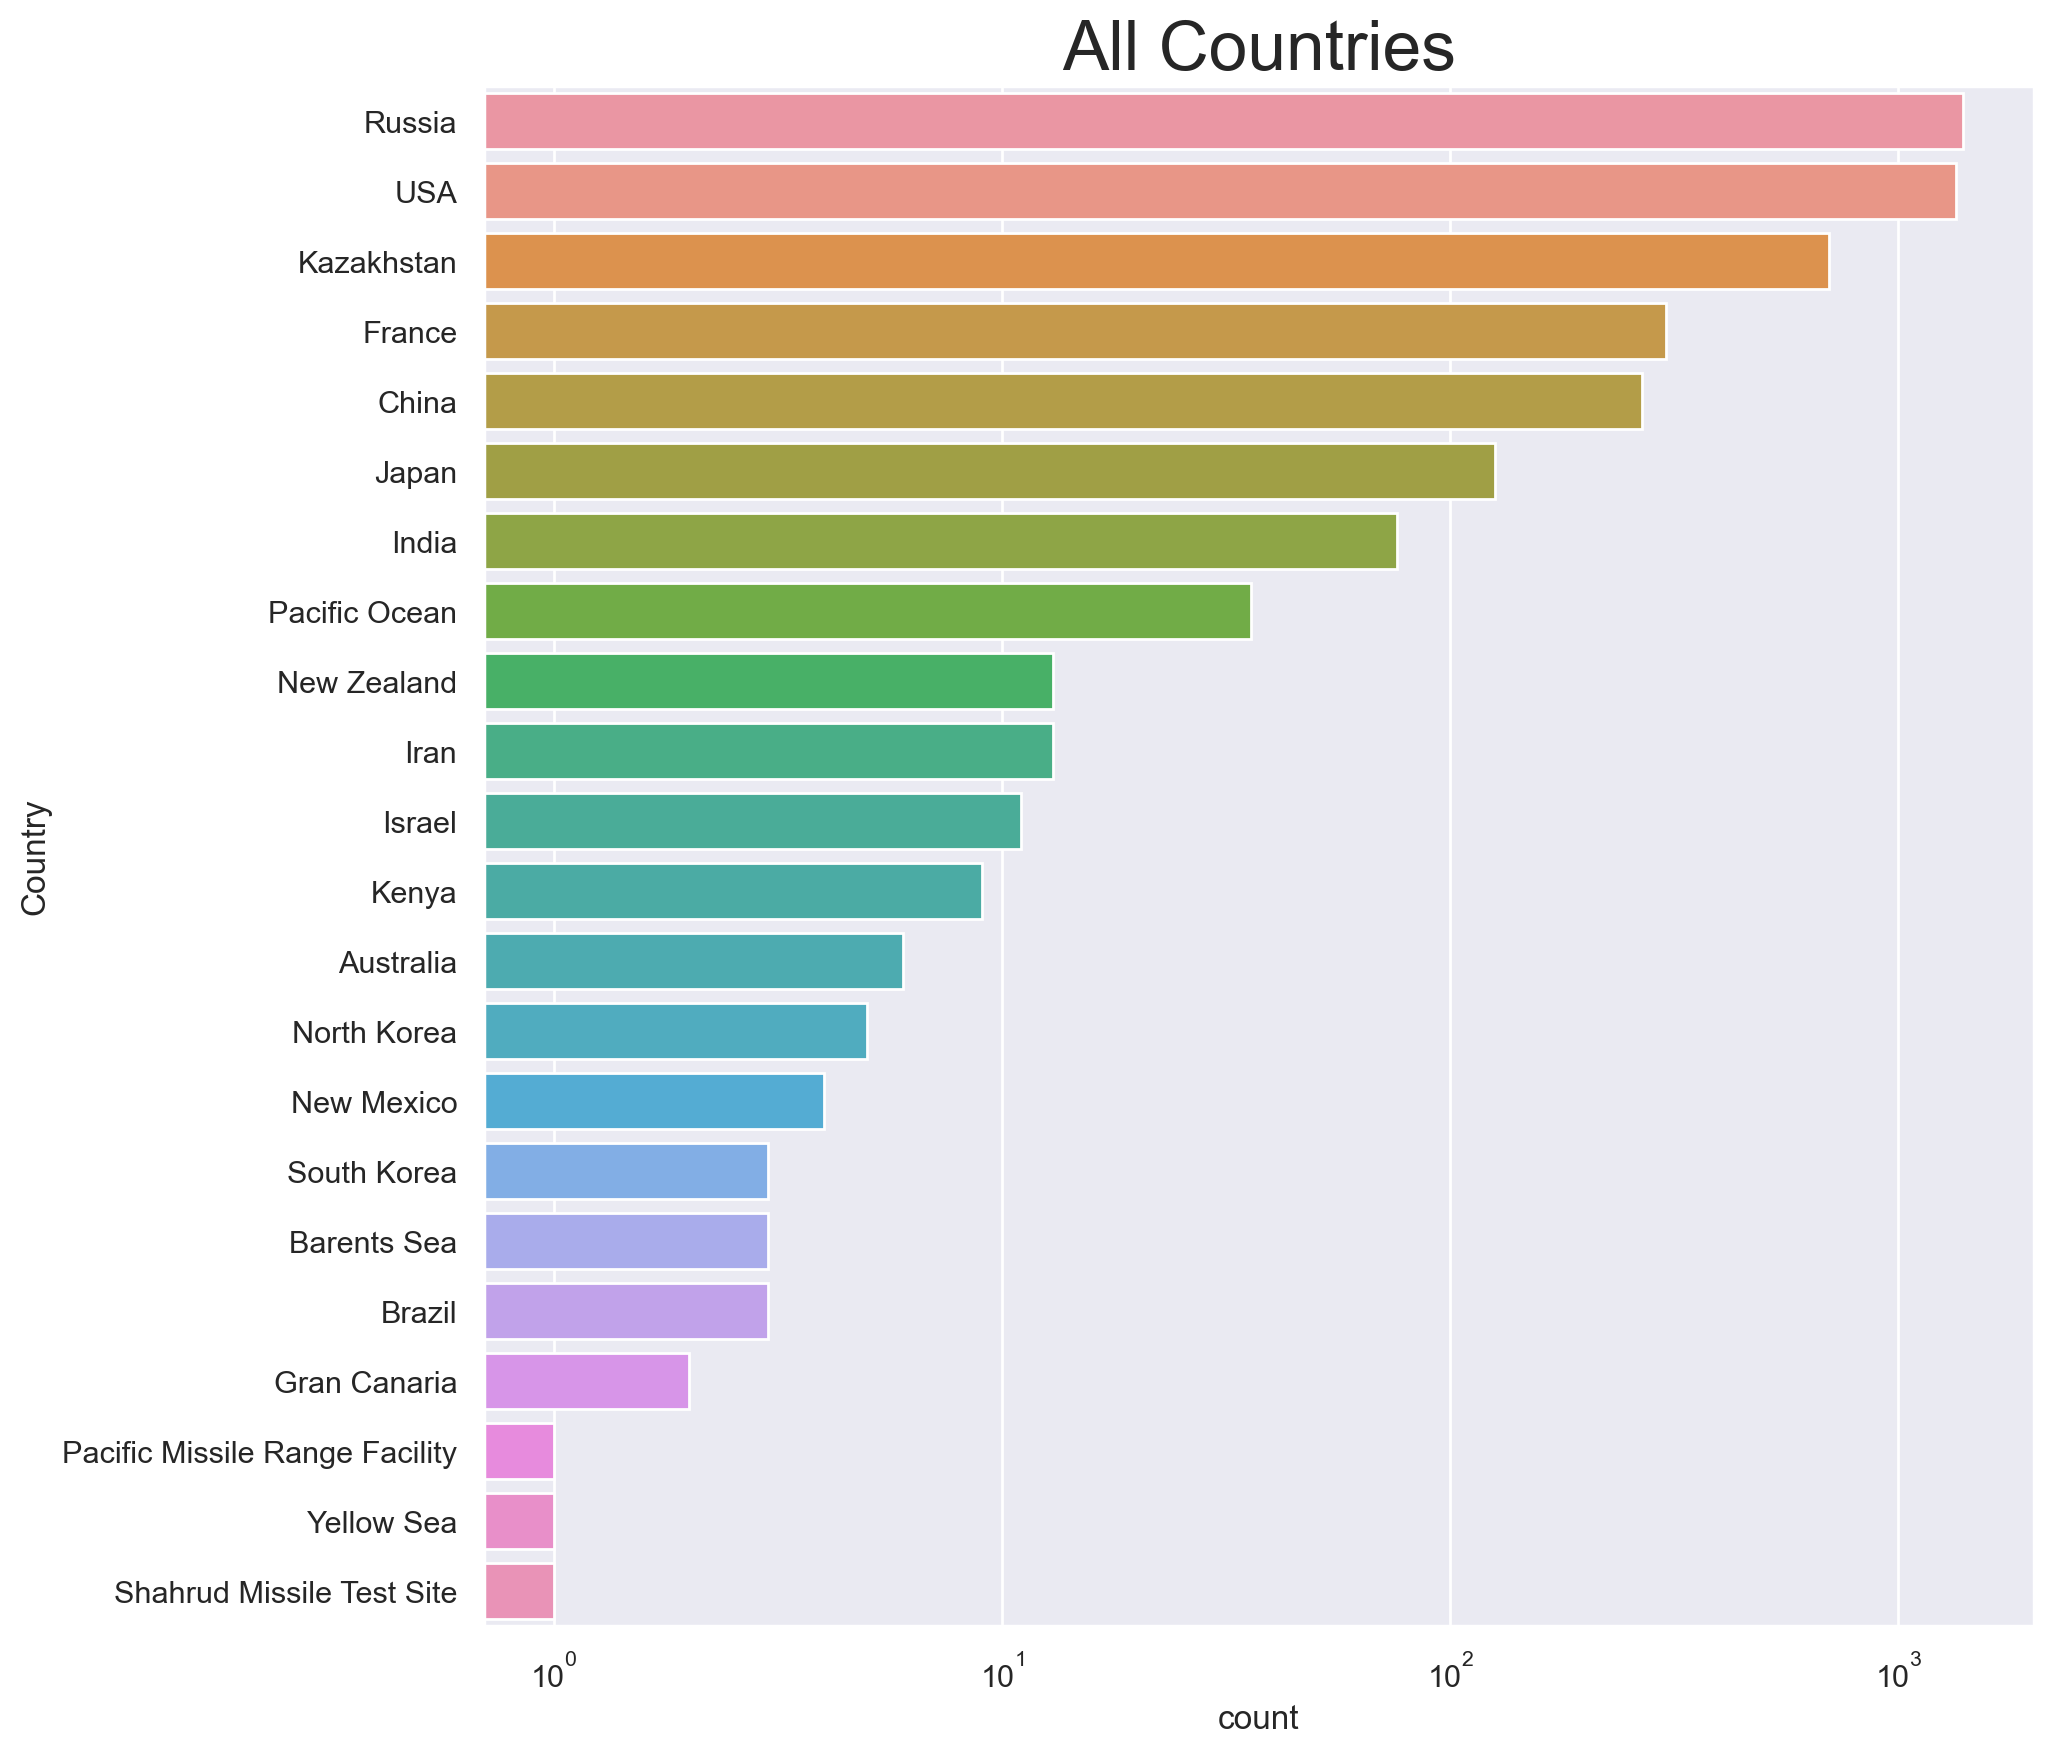

In [28]:
plt.figure(figsize=(10,10),dpi=200)
ax = sns.countplot(y="Country", data=df, order=df["Country"].value_counts().index)
ax.set_xscale("log")
plt.title('All Countries',size=25)
plt.show()


In [29]:
#Top 10 Countries leading the space launches

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1500x1200 with 0 Axes>

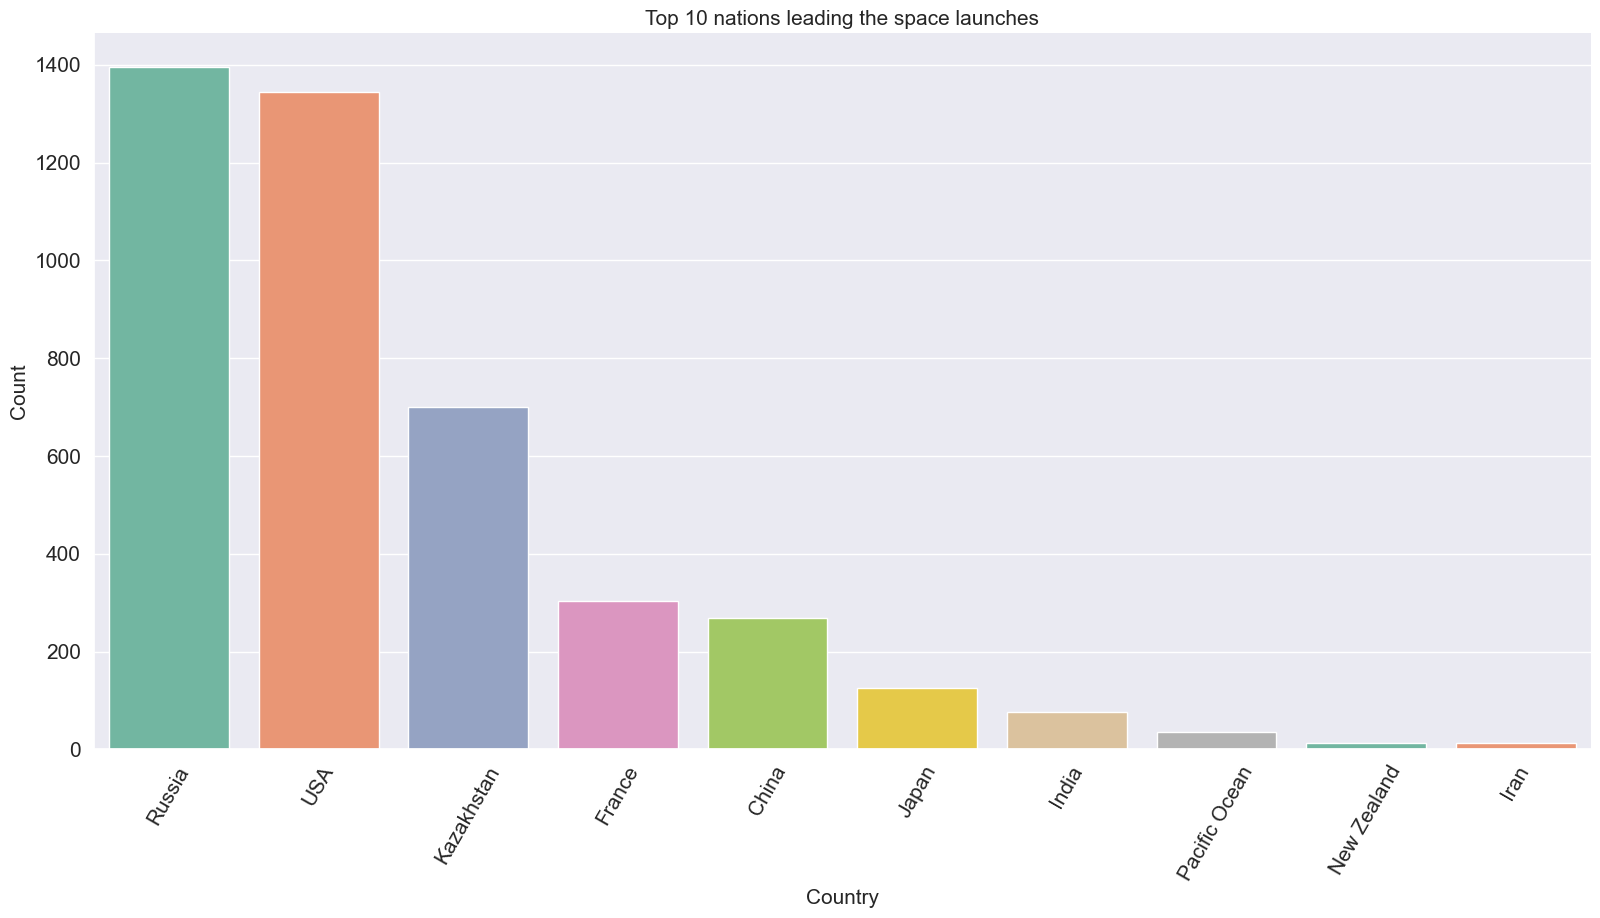

In [30]:
df_countries=df.groupby('Country')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_countries=df_countries.head(10)
plt.figure(figsize=(10,8),dpi=150)
sns.catplot('Country','Count',data=df_countries,aspect=2,height=8,kind='bar',palette='Set2')
plt.title('Top 10 nations leading the space launches',size=15)
plt.xticks(size=15,rotation=60)
plt.xlabel('Country',size=15)
plt.ylabel('Count',size=15)
plt.yticks(size=15)
plt.show()

In [31]:
#Countplot of Missions by Launch Sites

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


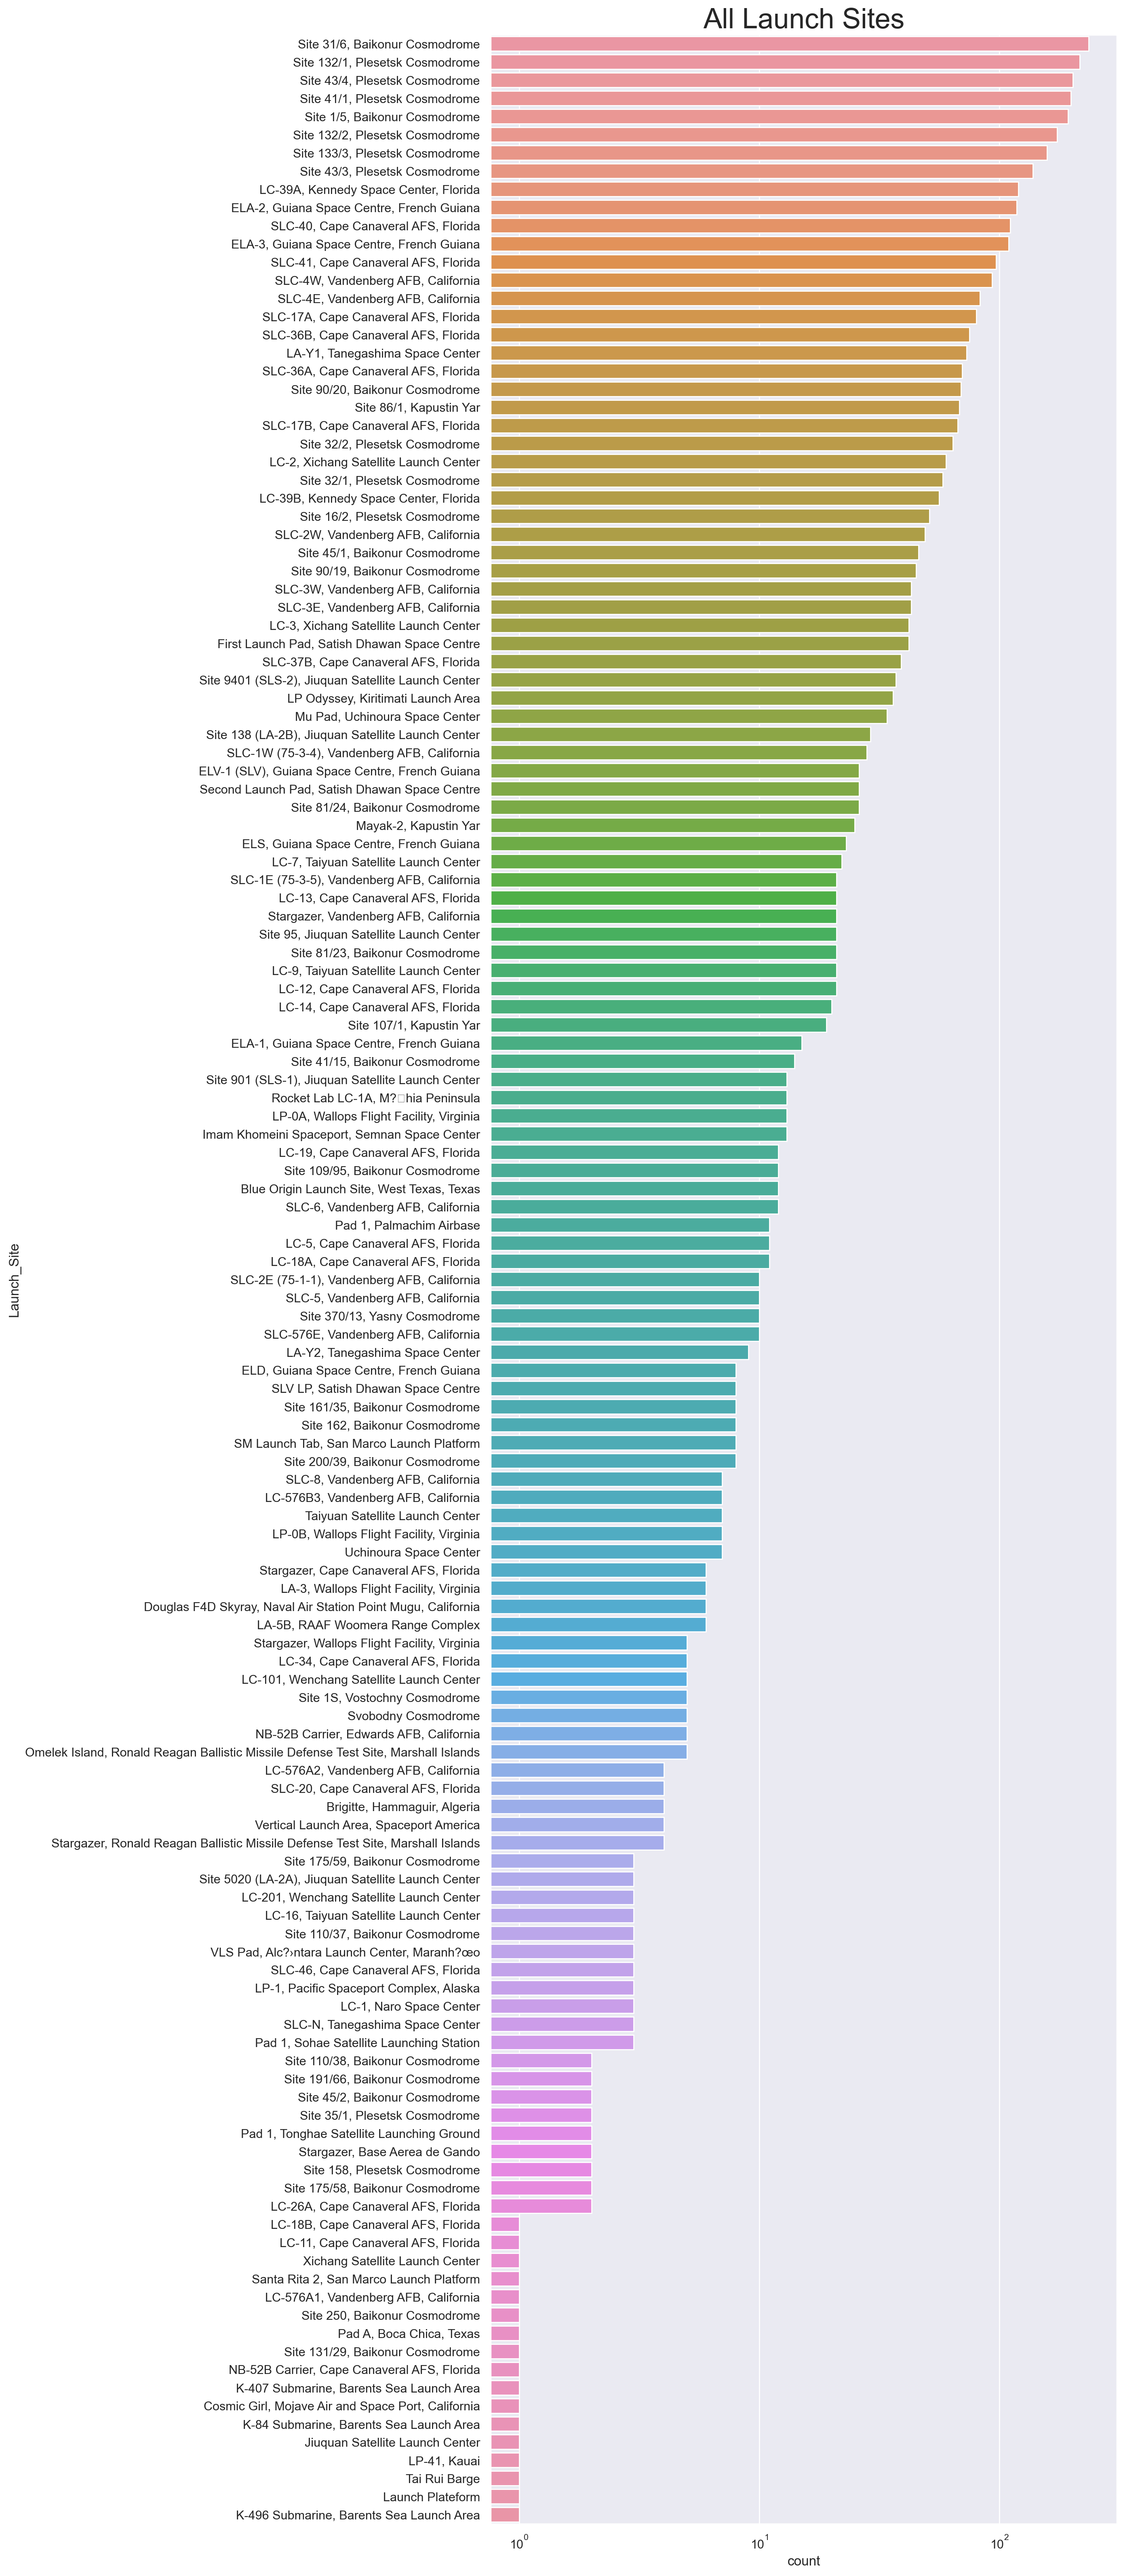

In [32]:
plt.figure(figsize=(10,40),dpi=200)
ax = sns.countplot(y="Launch_Site", data=df, order=df["Launch_Site"].value_counts().index)
ax.set_xscale("log")
plt.title('All Launch Sites',size=25)
plt.show()

In [33]:
#Countplot of launches by year

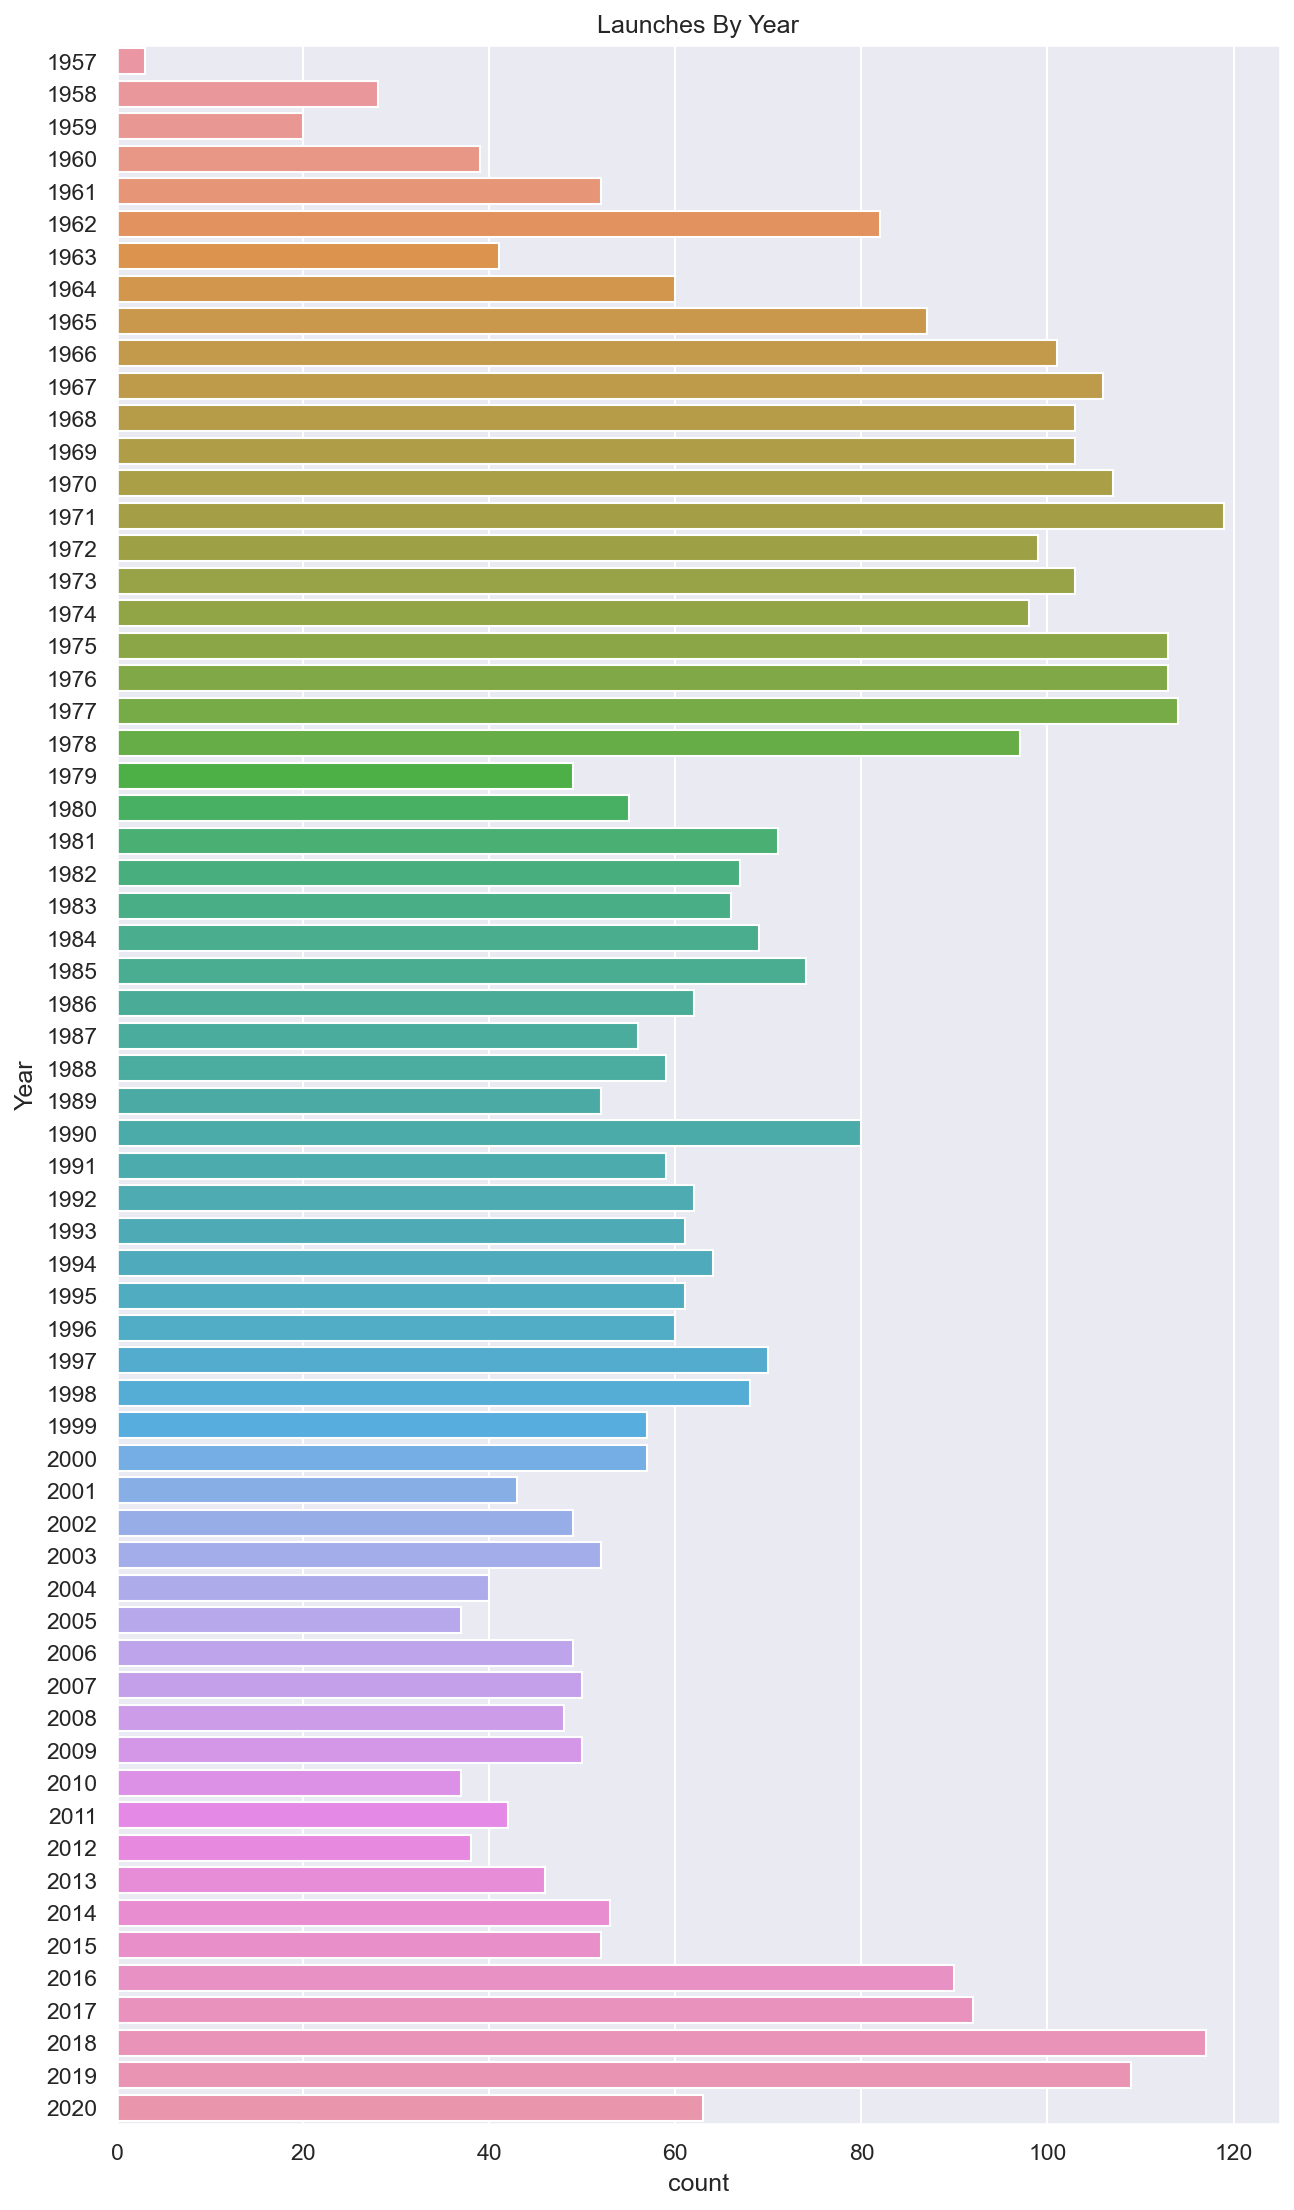

In [34]:
plt.figure(figsize=(10,18),dpi=150)
sns.countplot(data=df,y='Year')
plt.title("Launches By Year")
plt.show()

In [35]:
#Frequency of Launches by Year

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


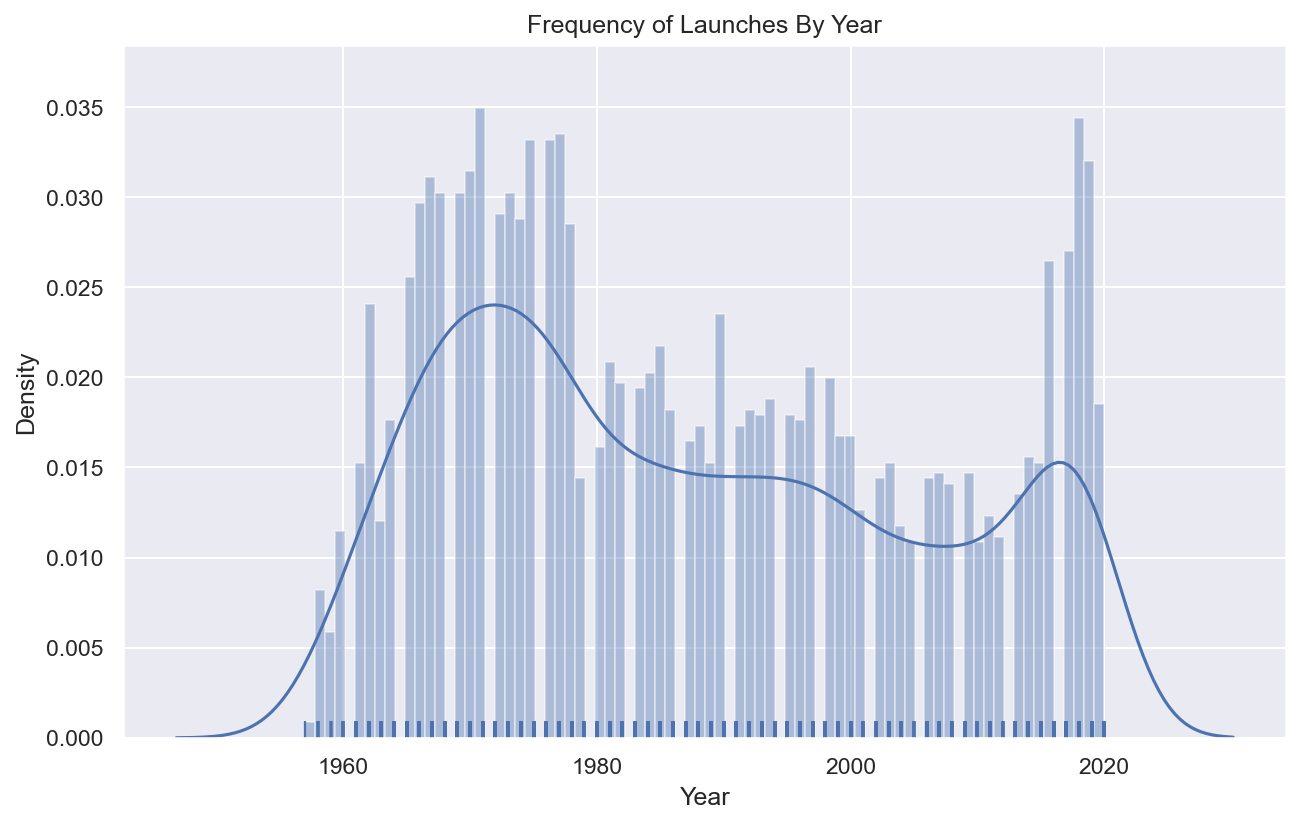

In [36]:
plt.figure(figsize=(10,6),dpi=150)
sns.distplot(df['Year'],kde=True,rug=True,bins=80)
plt.title("Frequency of Launches By Year")
plt.show()

In [37]:
#Number of Launches By Month

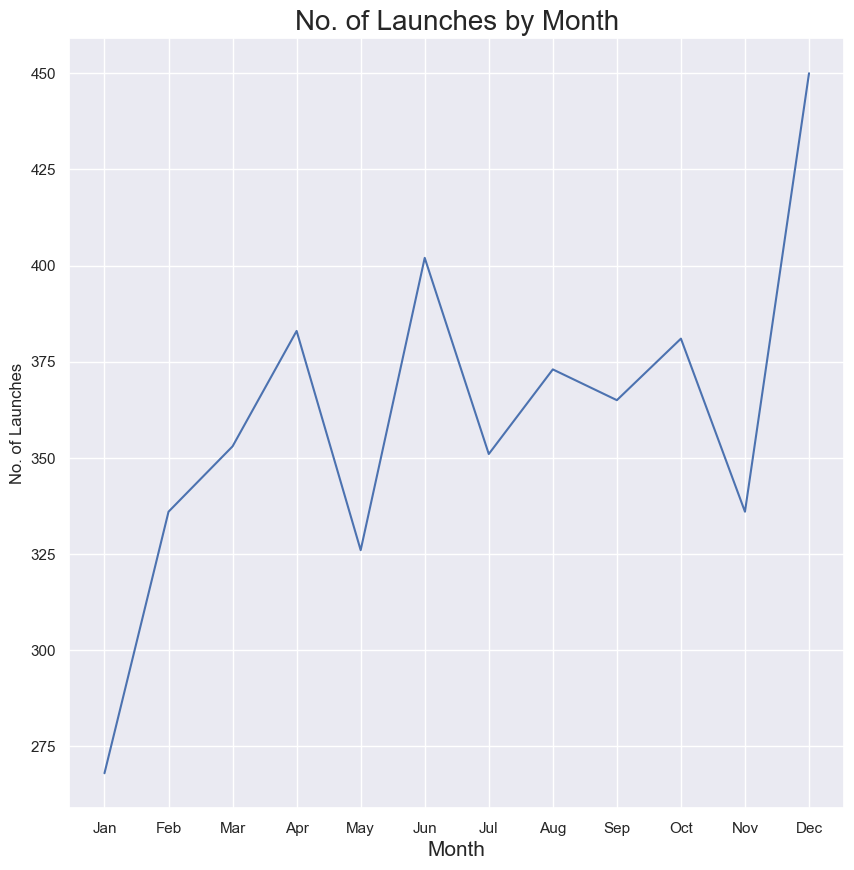

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('No. of Launches by Month', fontsize=20)
month_df=pd.DataFrame()
df['Month']=df['Datum'].apply(lambda datum: datum.split()[1])
month_df['Month']=df['Month'].value_counts().index
month_df['Launches']=df['Month'].value_counts().values
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sorter = [order.index(i) for i in month_df['Month']]
month_df['Sorter']=sorter
sns.lineplot(x = 'Month', y = "Launches", data=month_df.sort_values(by='Sorter'), sort=False)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('No. of Launches')
plt.show()

In [39]:
#Launches in 2020 by different Companies

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


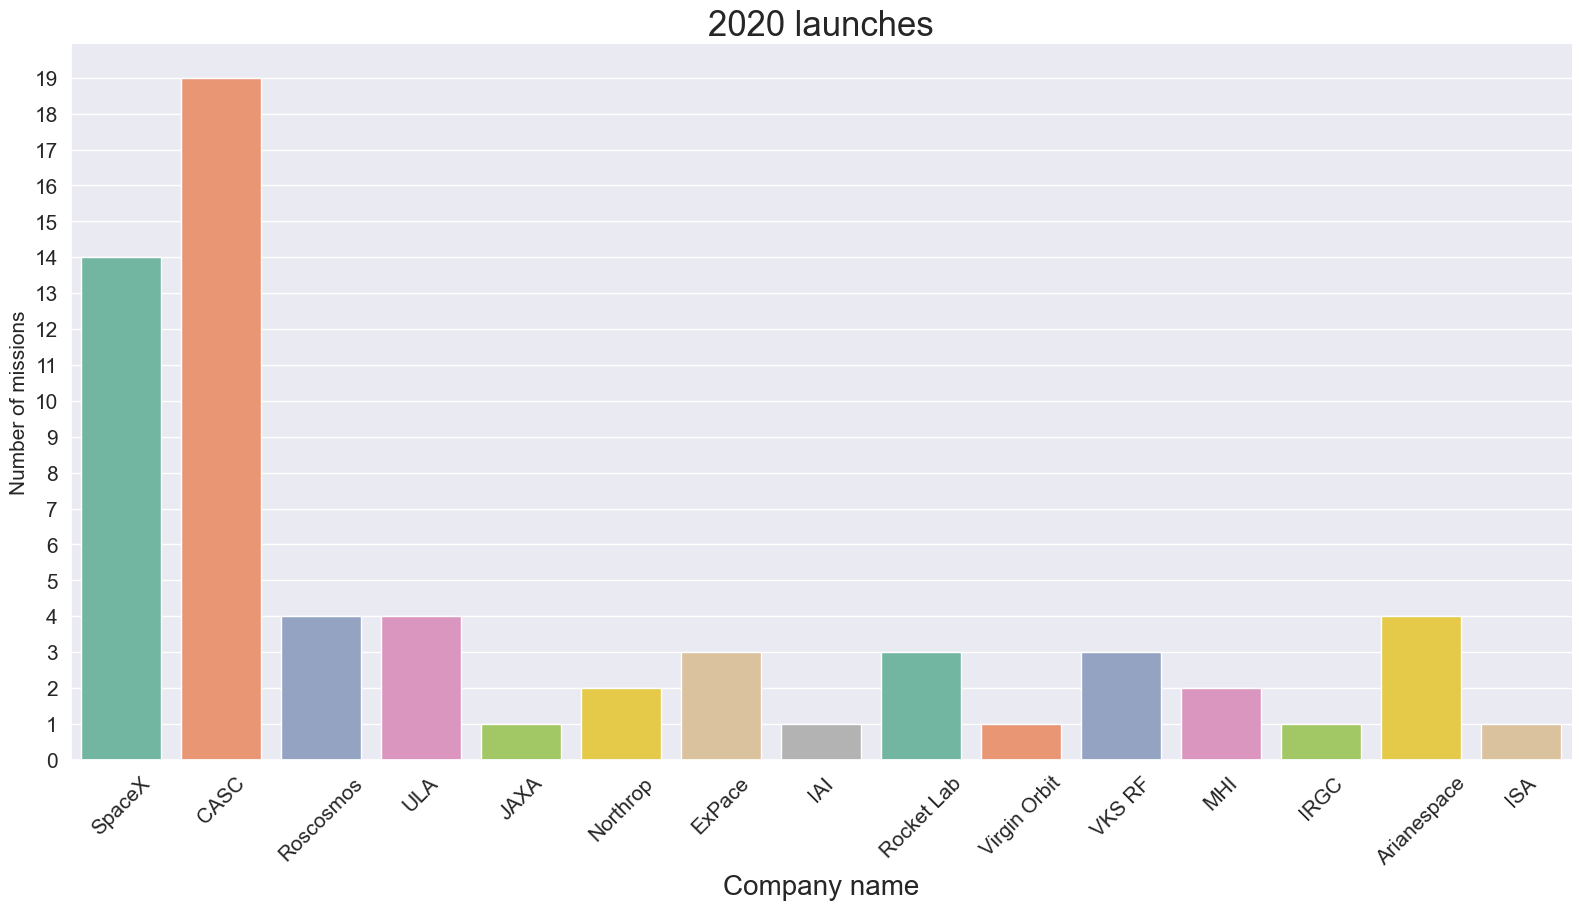

In [40]:
df_2020=df[df['Year']==2020]
sns.catplot('Company Name',data=df_2020,kind='count',aspect=2,height=8,palette='Set2')
plt.yticks(np.arange(20))
plt.title('2020 launches',size=25)
plt.xlabel('Company name',size=20)
plt.xticks(size=15,rotation=45)
plt.yticks(size=15)
plt.ylabel('Number of missions',size=15)
plt.show()

In [41]:
#Money Spent by Companies

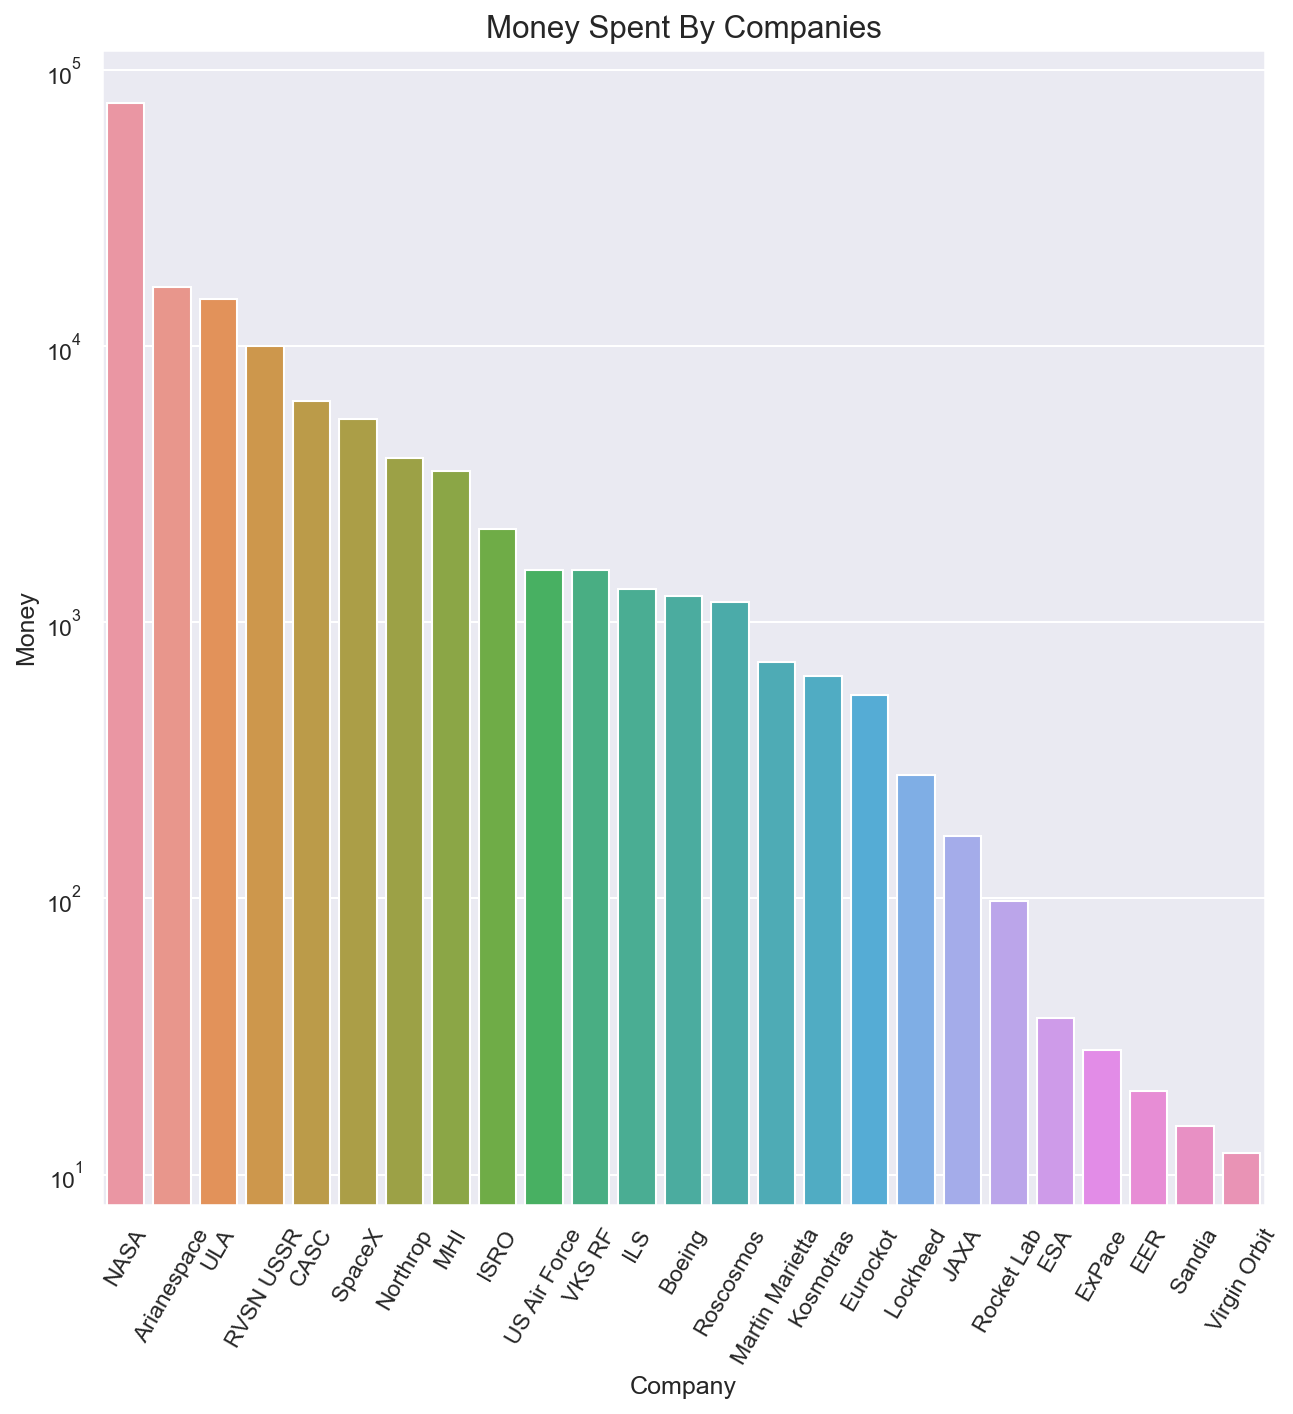

In [42]:
df.Rocket = df.Rocket.apply(lambda x: str(x).strip()).astype('float64')
data = df.groupby(['Company Name'])['Rocket'].sum().reset_index()
data = data[data['Rocket'] > 0].sort_values(by='Rocket', ascending=False)
data.columns = ['Company', 'Money']
plt.figure(figsize=(10,10),dpi=150)
plt.title("Money Spent By Companies",size=15)
ax=sns.barplot(data=data,x='Company',y='Money')
ax.set_yscale("log")
plt.xticks(rotation=60)
plt.show()

In [43]:
#Countplot of Mission Status

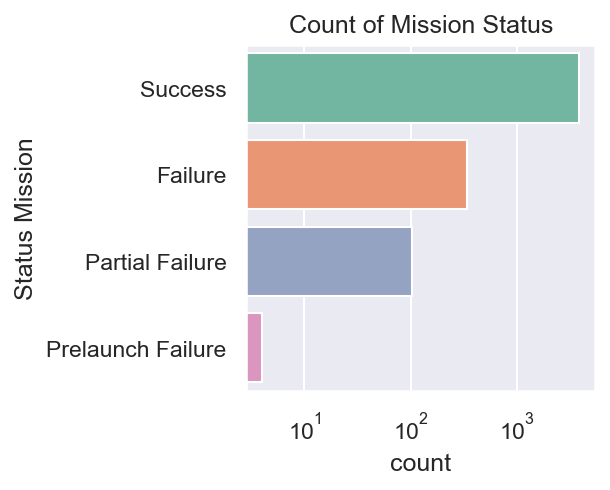

In [44]:
plt.figure(figsize=(3,3),dpi=150)
ax = sns.countplot(data=df,y='Status Mission',order=df["Status Mission"].value_counts().index, palette="Set2")
ax.set_xscale("log")
plt.title("Count of Mission Status")
plt.show()

In [45]:
fig = px.pie(df,names='Status Mission', title='Status of Mission',width=600, height=400)
fig.show()

In [46]:
#Countplot of Missions by Rocket Retirement Status

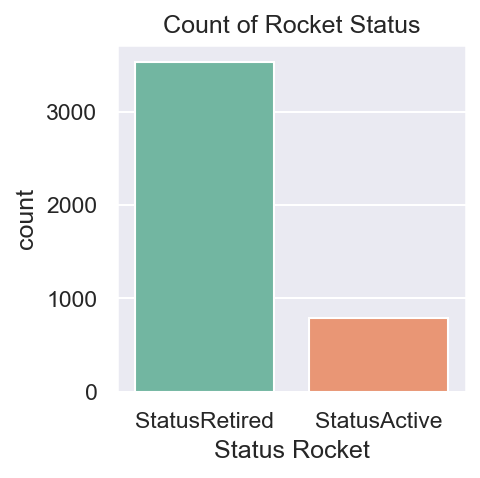

In [47]:
plt.figure(figsize=(3,3),dpi=150)
sns.countplot(x="Status Rocket",data=df,order=df["Status Rocket"].value_counts().index,palette='Set2')
plt.title("Count of Rocket Status")
plt.show()

In [48]:
#ISRO data Analysis

In [49]:
df_isro=df[df["Company Name"]=="ISRO"]

In [50]:
df_isro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 72 to 2502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    76 non-null     object 
 1   Location        76 non-null     object 
 2   Datum           76 non-null     object 
 3   Detail          76 non-null     object 
 4   Status Rocket   76 non-null     object 
 5   Rocket          67 non-null     float64
 6   Status Mission  76 non-null     object 
 7   Country         76 non-null     object 
 8   DateTime        76 non-null     object 
 9   Year            76 non-null     int64  
 10  Launch_Site     76 non-null     object 
 11  Count           76 non-null     int64  
 12  Month           76 non-null     object 
dtypes: float64(1), int64(2), object(10)
memory usage: 8.3+ KB


In [51]:
df_isro.head(10)

Company Name                                           Location  \
72          ISRO  First Launch Pad, Satish Dhawan Space Centre, ...   
80          ISRO  Second Launch Pad, Satish Dhawan Space Centre,...   
121         ISRO  Second Launch Pad, Satish Dhawan Space Centre,...   
138         ISRO  First Launch Pad, Satish Dhawan Space Centre, ...   
149         ISRO  Second Launch Pad, Satish Dhawan Space Centre,...   
164         ISRO  First Launch Pad, Satish Dhawan Space Centre, ...   
179         ISRO  Second Launch Pad, Satish Dhawan Space Centre,...   
188         ISRO  First Launch Pad, Satish Dhawan Space Centre, ...   
195         ISRO  Second Launch Pad, Satish Dhawan Space Centre,...   
215         ISRO  First Launch Pad, Satish Dhawan Space Centre, ...   

                          Datum                                     Detail  \
72   Wed Dec 11, 2019 09:55 UTC                       PSLV-QL | RISAT 2BR1   
80   Wed Nov 27, 2019 03:58 UTC          PSLV-XL | Cartosat-3 & Rideshares   
121  Mon Jul 22, 2019 09:13 UTC  GSLV Mk III | Chandrayaan-2 lunar mission   
138  Wed May 22, 2019 00:00 UTC                         PSLV-CA | RISAT-2B   
149  Mon Apr 01, 2019 03:57 UTC              PSLV-QL | EMISAT & Rideshares   
164  Thu Jan 24, 2019 18:07 UTC                       PSLV-DL | Microsat-R   
179  Wed Dec 19, 2018 10:40 UTC                       GSLV Mk II | GSAT-7A   
188  Thu Nov 29, 2018 04:27 UTC                            PSLV-CA | HySIS   
195  Wed Nov 14, 2018 11:38 UTC                      GSLV Mk III | GSAT 29   
215  Sun Sep 16, 2018 16:38 UTC               PSLV-CA | SSTL-1 & NovaSAR-S   

    Status Rocket  Rocket Status Mission Country                   DateTime  \
72   StatusActive    21.0        Success   India  2019-12-11 09:55:00+00:00   
80   StatusActive    31.0        Success   India  2019-11-27 03:58:00+00:00   
121  StatusActive    62.0        Success   India  2019-07-22 09:13:00+00:00   
138  StatusActive    21.0        Success   India  2019-05-22 00:00:00+00:00   
149  StatusActive    21.0        Success   India  2019-04-01 03:57:00+00:00   
164  StatusActive     NaN        Success   India  2019-01-24 18:07:00+00:00   
179  StatusActive    47.0        Success   India  2018-12-19 10:40:00+00:00   
188  StatusActive    21.0        Success   India  2018-11-29 04:27:00+00:00   
195  StatusActive    62.0        Success   India  2018-11-14 11:38:00+00:00   
215  StatusActive    21.0        Success   India  2018-09-16 16:38:00+00:00   

     Year                                    Launch_Site  Count Month  
72   2019   First Launch Pad, Satish Dhawan Space Centre      1   Dec  
80   2019  Second Launch Pad, Satish Dhawan Space Centre      1   Nov  
121  2019  Second Launch Pad, Satish Dhawan Space Centre      1   Jul  
138  2019   First Launch Pad, Satish Dhawan Space Centre      1   May  
149  2019  Second Launch Pad, Satish Dhawan Space Centre      1   Apr  
164  2019   First Launch Pad, Satish Dhawan Space Centre      1   Jan  
179  2018  Second Launch Pad, Satish Dhawan Space Centre      1   Dec  
188  2018   First Launch Pad, Satish Dhawan Space Centre      1   Nov  
195  2018  Second Launch Pad, Satish Dhawan Space Centre      1   Nov  
215  2018   First Launch Pad, Satish Dhawan Space Centre      1   Sep

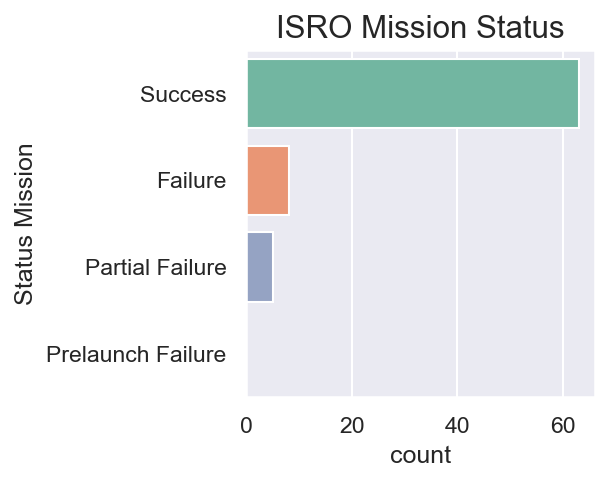

In [52]:
plt.figure(figsize=(3,3),dpi=150)
sns.countplot(data=df_isro,y='Status Mission',order=df["Status Mission"].value_counts().index, palette="Set2")
plt.title("ISRO Mission Status",size=15)
plt.show()

In [53]:
#Countplot of launches by Year

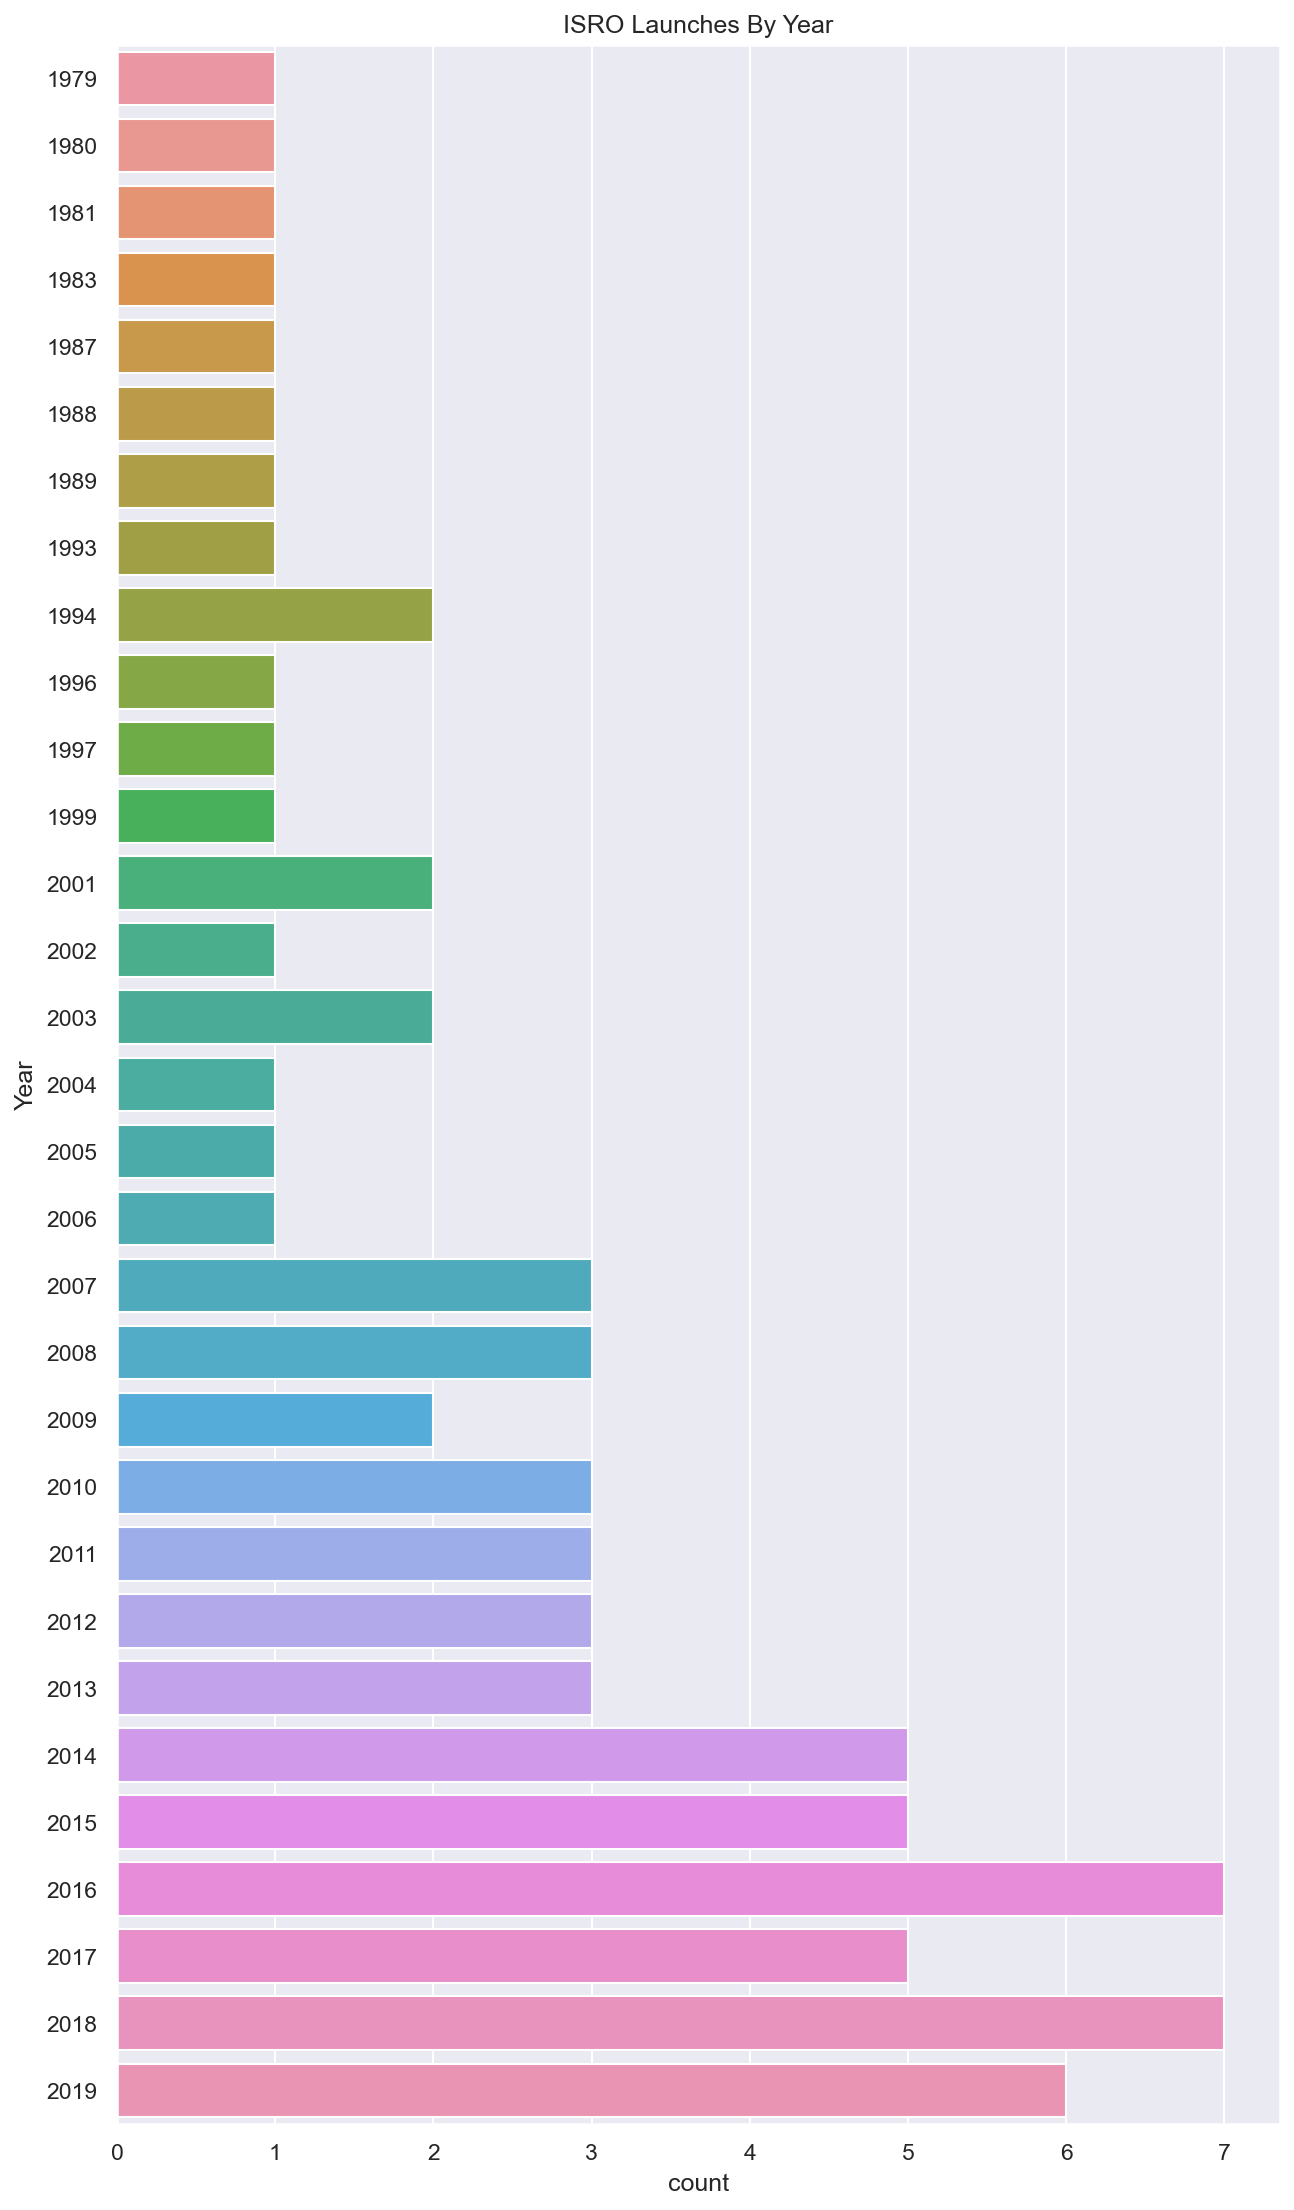

In [54]:
plt.figure(figsize=(10,18),dpi=150)
sns.countplot(data=df_isro,y='Year')
plt.title("ISRO Launches By Year")
plt.show()

In [55]:
#Now lets see which is the most used launch pad for isro

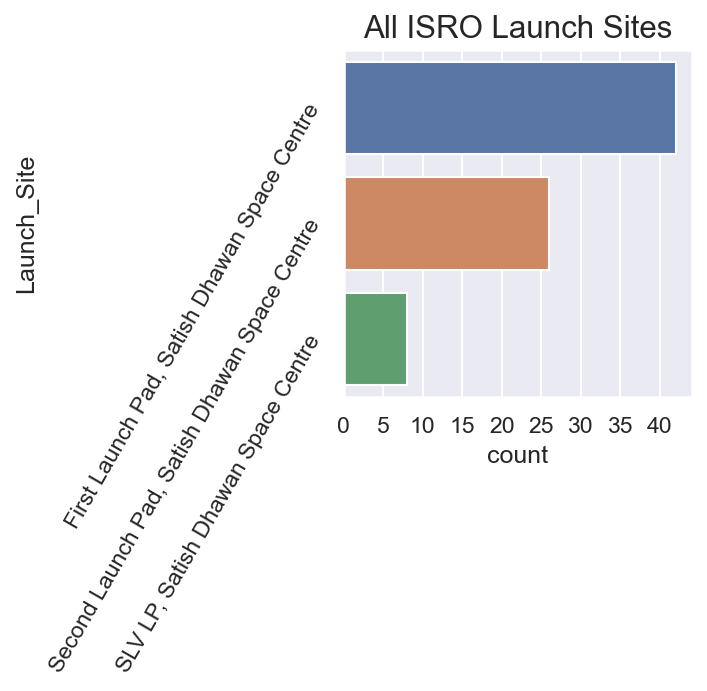

In [56]:
plt.figure(figsize=(3,3),dpi=150)
ax = sns.countplot(y="Launch_Site", data=df_isro, order=df_isro["Launch_Site"].value_counts().index)
plt.title('All ISRO Launch Sites',size=15)
plt.yticks(rotation=60)
plt.rc('xtick',labelsize=4)
plt.rc('ytick',labelsize=4)
plt.show()

In [57]:
#the most used site is First Launch pad, Satish Dhawan Space Center

In [58]:
df.to_csv(r"C:\\New folder\\Space_Missions_Cleaned.csv",index=False)# Saving the cleaned df object into a csv file.

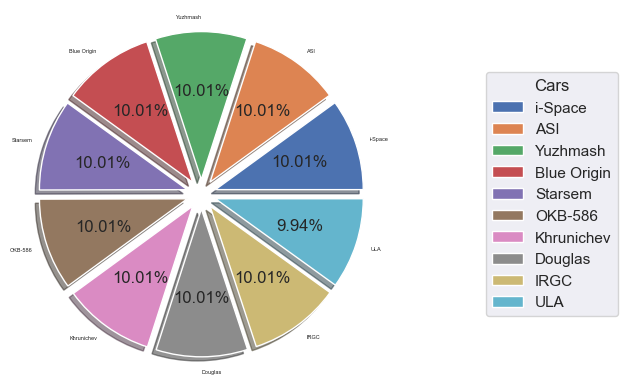

In [59]:
o=df.iloc[:,6]
b=df.iloc[:,0]
o=o.tolist()
des=[]
for i in range(len(o)):
    if o[i]=='Success':
        des.append(1)
    else:
        des.append(0)
a1 = pd.DataFrame(b)        
des=pd.Series(des,name="success")
b1=pd.DataFrame(des)
des=pd.concat([a1,des], axis=1)
des=des.groupby("Company Name")
f1=des.sum()
f=des.count()
g=f.iloc[:,0]
g=g.tolist()
g1=f1.iloc[:,0]
g1=g1.tolist()
ht=[]
for i in range(len(g)):
    ht.append(g1[i]/g[i]*100)
b=b.tolist()
g={'0'}
for i in b:
    g.add(i)
g.discard('0')
l=[]
for i in g:
    l.append(i)
l.sort()
ht2=pd.Series(ht,name="SP")
ht2=pd.DataFrame(ht2)
l1=pd.Series(l,name="Comany Name")
l1=pd.DataFrame(l1)
ht1=pd.concat([l1,ht2],axis=1)
ht1=ht1.sort_values(["SP"], ascending=[0])
t=ht1.iloc[:10,:]
g=t.iloc[:,0]
g=g.tolist()
f=t.iloc[:,1]
f=f.tolist()
et=[.1]*len(g)
plt.pie(f,explode=et, labels=g, colors=None,autopct='%1.2f%%',shadow=True)
plt.legend( title ="Cars",loc ="center left",bbox_to_anchor =(1.25, 0, 2, 1))
plt.show()

In [60]:
#Visualization of Success Rates of the Mars Club

Text(0.5, 1.0, 'Visualization of Success Rates of the Mars Club')

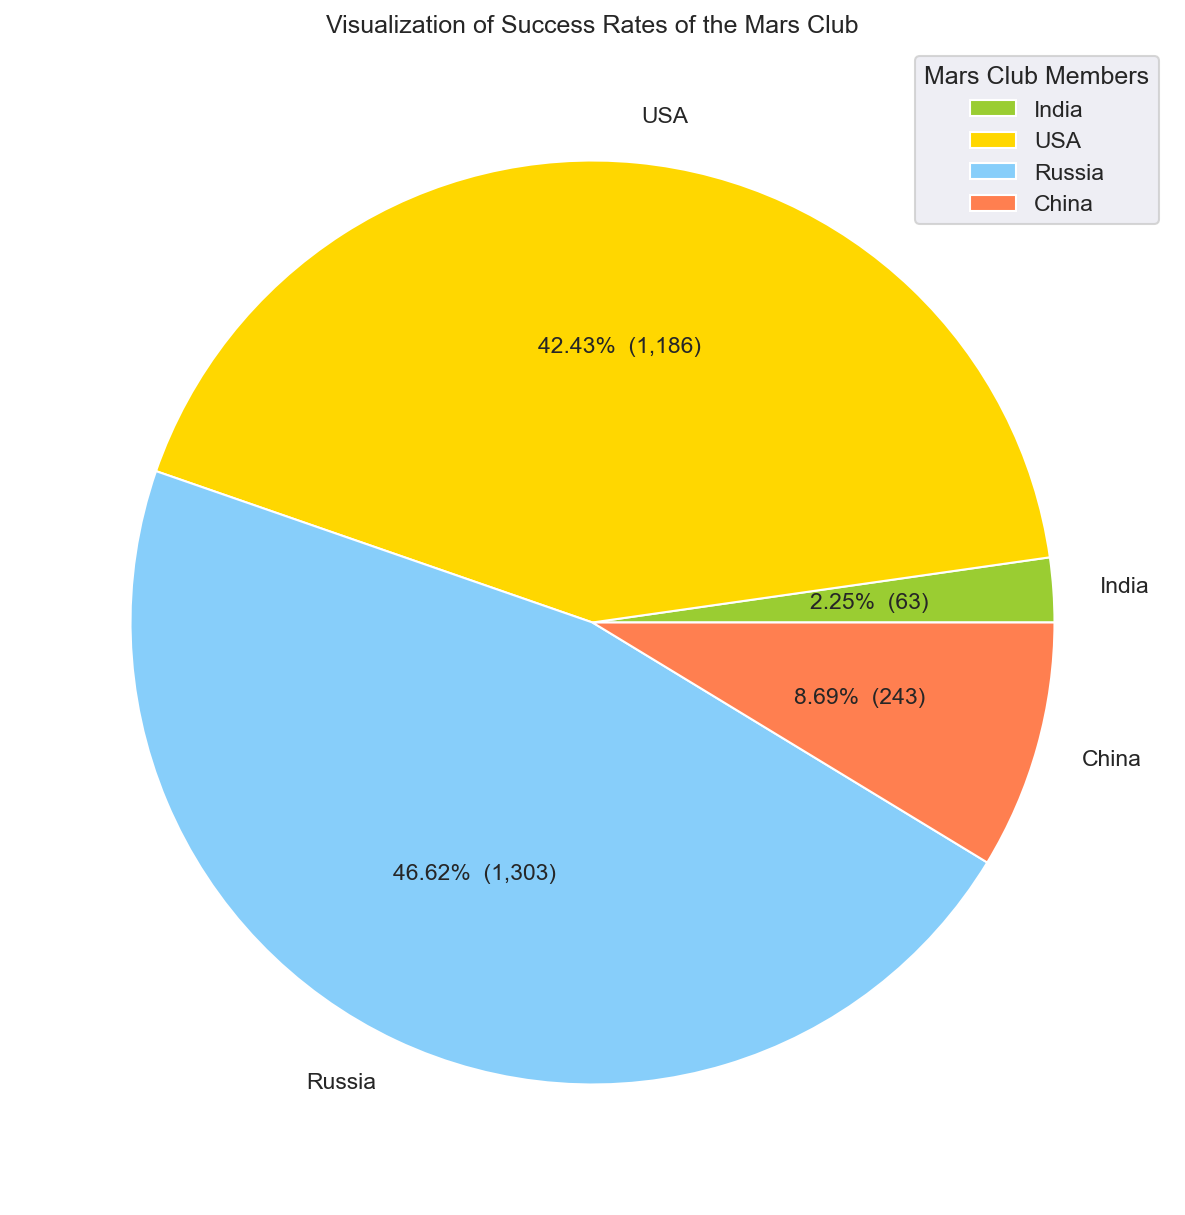

In [61]:
df_india=df[df["Country"]=="India"]
df_usa=df[df["Country"]=="USA"]
df_russia=df[df["Country"]=="Russia"]
df_china=df[df["Country"]=="China"]
india=(df_india["Status Mission"]=="Success").sum() 
usa=(df_usa["Status Mission"]=="Success").sum() 
russia=(df_russia["Status Mission"]=="Success").sum() 
china=(df_china["Status Mission"]=="Success").sum() 
plt.figure(figsize=(10,10),dpi=150)
countries=[india,usa,russia,china]
Lab=["India","USA","Russia","China"]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'coral']
plt.pie(countries, labels = Lab, autopct= lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(countries)/100), colors = colors, textprops={'fontsize': 11})
plt.legend(Lab, loc="best", title ="Mars Club Members")
plt.title("Visualization of Success Rates of the Mars Club")